# Time Series data generation

In [179]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

Equation of a wave: y(x,t) = a * sin (ω*x + φ) 

a = amplitude of the wave (min max values)

ω = angular frequency (how many cycles occur in a second)

x = number of points

φ = phase of the signal (where do we start)

In [197]:
sample=1000
noise = 0.04*np.random.rand(sample)
noise2 = 300*np.random.rand(sample)
def timeseries(amplitude,frequency,phase,x):
    y = np.zeros(len(x))
    number = random.uniform(0,1)
    if number<0.65:
        for i in range(len(amplitude)):
            y += np.sin(frequency[i]*x+phase[i])*amplitude[i]
    else:
        for i in range(len(amplitude)):
            y += (np.sin(frequency[i]*x+phase[i])*amplitude[i])+noise
    return y

def timeseriesPeak(timeseries,x):
    start = np.random.randint(len(x))
    end = start+100
    
    peak = np.sin(0.001*x)*300
    peak += np.random.rand(1000)
    
    peak[x<start]=0
    peak[x>end]=0
    
    return timeseries+peak, peak


def timeseriesDec(amplitude,frequency,phase,x,slope):
    y = np.zeros(len(x))
    number = random.uniform(0,1)
    if number<0.65 :
        for i in range(len(amplitude)):
              y += (np.sin(frequency[i]*x-phase[i])*amplitude[i]-slope[i]*x)+noise2
    else:
         for i in range(len(amplitude)):
              y += (np.sin(frequency[i]*x-phase[i])*amplitude[i]-slope[i]*x)
        
    return y

def timeseriesPeakDec(timeseriesDec,x):
    start = np.random.randint(len(x))
    end = start+80
    
    peakDec = np.sin(0.01*x)*200+500*x
    peakDec += np.random.rand(1000)
    
    peakDec[x<start]=0
    peakDec[x>end]=0
    
    return timeseriesDec+peakDec, peakDec

def updwntimeseries(amplitude,frequency,phase,x):
    y = np.zeros(len(x))
    number = random.uniform(0,1)
    if number<0.65:
        for i in range(len(amplitude)):
            y += np.sin(frequency[i]*x+phase[i])*amplitude[i]
    else:
        for i in range(len(amplitude)):
            y += (np.sin(frequency[i]*x+phase[i])*amplitude[i])+noise
    return y

def updwntimeseriesPeak(timeseriesPeakDec,x):
    start = np.random.randint(len(x))
    end = start+80
    
    peak = np.sin(0.001*x)*60
    
    peak[x<start]=0
    peak[x>end]=0
    
    return timeseriesPeakDec+peak, peak

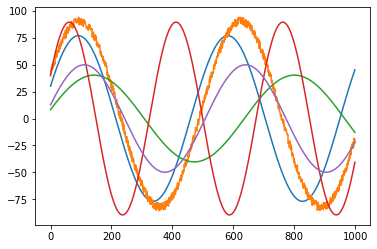

In [200]:
# vectors for w phase and amplitude regular shape
# these arrrays contain 200 random values between (0,1) and we multiply the w by 0.02 to
# ensure cycles in the time series 
p1 = np.random.rand(200)
a1 = np.random.rand(200)
w1 = np.ones(200)*0.02

x = np.arange(start=0, stop=(1000))

# We will create 200 time series, we will multiply the w phase and amplitude
# to obtain different results
yValues = []
for i in range(1,200):
    rand_w = np.random.uniform(0.3,1)
    rand = np.random.uniform(0,1)
    y=timeseries(a1*rand,w1*rand_w,p1*rand,x)
    yValues.append(y)
    if i <= 5:
        plt.plot(x,y)

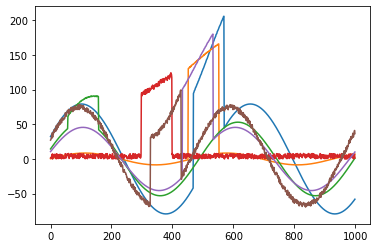

In [182]:
# We will create 200 time series with spikes
ySpikes = []
for i in range(0,len(yValues)):
    y, peak = timeseriesPeak(yValues[i],x)
    ySpikes.append((y,peak))
    if i <= 5:
        plt.plot(x,y)

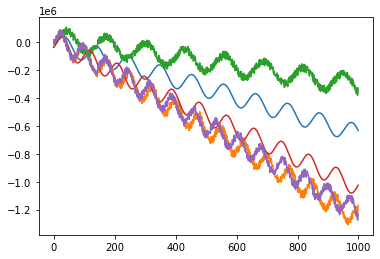

In [183]:
p2 = np.random.rand(200)
a2 = np.random.randint(100,600,200)
w2 = np.ones(200)

b = np.ones(200)

x = np.arange(start=0, stop=(1000))
yValuesDec = []
for i in range(1,200):
    rand_w = np.random.uniform(0.02,0.1)
    rand = np.random.uniform(1,10)
    y = timeseriesDec(a2,w2*rand_w,p2,x,b*rand)
    yValuesDec.append(y)
    if i <= 5:
        plt.plot(x,y)



#z = (np.sin(x*0.02-150)*400-4*x)+0.4*(10**15)


#plt.plot(x,z)


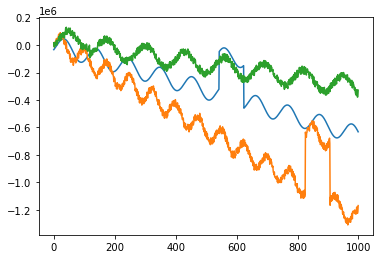

In [184]:
# We will create 200 time series with spikes
ySpikesDec = []
for i in range(0,len(yValuesDec)):
    y, peakDec = timeseriesPeakDec(yValuesDec[i],x)
    ySpikesDec.append((y,peakDec))
    if i <= 2:
        plt.plot(x,y)

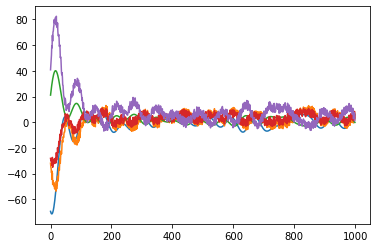

In [185]:
w3 = np.random.rand(200)*0.1#+0.1
p3 = np.random.rand(200)
a3 = np.random.rand(200)*0.1#+0.1

x = np.arange(start=0, stop=1000)

yValuesupdwn = []
for i in range(1,200):
  randa = np.random.uniform(1,10)
  randp = np.random.uniform(1,20)
  y = updwntimeseries(a3*randa,w3,p3+randp,x)
  yValuesupdwn.append(y)
  if i <= 5:
      plt.plot(x,y)


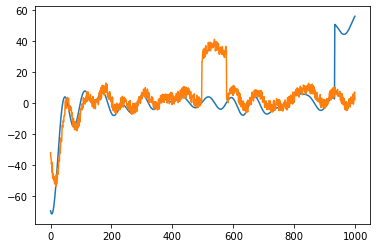

In [201]:
ySpikesupdwn = []
for i in range(0,len(yValuesupdwn)):
    y, peakupdwn = updwntimeseriesPeak(yValuesupdwn[i],x)
    ySpikesupdwn.append((y,peakupdwn))
    if i <= 1:
        plt.plot(x,y)

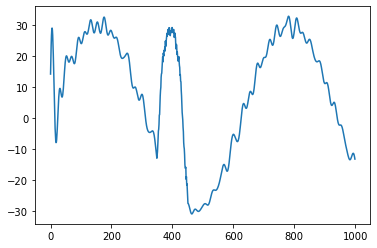

In [187]:
randcomp = 200

w_rand_ampl=0.2
w_rand_offs=0.1

w = np.random.rand(200)*0.2+0.1
p = np.random.rand(200)
a = np.random.rand(200)*0.1+0.1

x = np.arange(start=0, stop=1000)

y = np.zeros(1000)
for i in range(200):
  y += np.sin(w[i]*x+p[i])*a[i]

peak = -0.02*(x-400)**2+50
peak += np.random.rand(1000)*3
peak[x<350]=0
peak[x>450]=0
#plt.plot(x,peak)
plt.plot(x,y+peak+np.sin(0.01*x)*30)



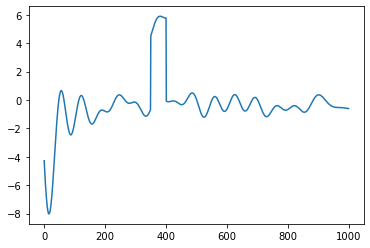

In [188]:
w = np.random.rand(200)*0.1#+0.1
p = np.random.rand(200)
a = np.random.rand(200)*0.1#+0.1

x = np.arange(start=0, stop=1000)

y = np.zeros(1000)
for i in range(200):
  y -= np.sin(w[i]*x+p[i])*a[i]
  

#peak = 0.01*(x-100)
peak = np.sin(0.001*x)*15
peak[x<350]=0
peak[x>400]=0
plt.plot(x,y+peak)

770
870


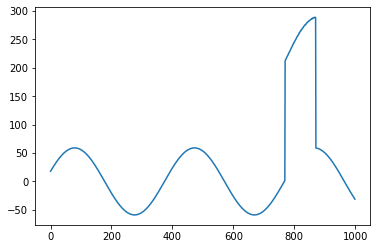

In [189]:
start = np.random.randint(900)
end = start+100
print(start)
print(end)

peak = np.sin(0.001*x)*300
peak += np.random.rand(1000)
peak[x<start]=0
peak[x>end]=0
plt.plot(x,yValues[25]+peak)
#plt.plot(x,peak)

In [190]:
def timeseries2Df(ts,peak):
  peak[peak > 0] = 1
  d = { 'value': ts , 'anomaly':peak}
  return pd.DataFrame(data=d)


In [191]:
df = timeseries2Df(ySpikes[1][0],ySpikes[1][1])
df

,value,anomaly
0,0.373044,0.0
1,0.488055,0.0
2,0.602976,0.0
3,0.717787,0.0
4,0.832468,0.0
...,...,...
995,6.814177,0.0
996,6.882672,0.0
997,6.949910,0.0
998,7.015878,0.0


In [195]:
def timeseries2Df(ts,peak):
  peak[peak > 0] = 1
  d = { 'value': ts , 'anomaly':peak}
  return pd.DataFrame(data=d)

def timeseries2Df(ts,tspikes,tdecspikes,tudspikes):
  for i in range(len(ts)):
    #values --> tspikes[i][0] peaks --> tspikes[i][1]
    peak = [tspikes[i][1] , tdecspikes[i][1], tudspikes[i][1]]
    peak = [[1 if x > 0 else 0 for x in subpeak] for subpeak in peak]
    d = { 'val':ts[0] , 'valS':tspikes[i][0], 'valspike':peak[0], 'decvals':tdecspikes[i][0], 'decspike':peak[1], 'udval':tudspikes[i][0], 'udspikes':peak[2]}
  return pd.DataFrame(data=d)

In [196]:
data = [ yValues, ySpikes,ySpikesDec,ySpikesupdwn ]
df = timeseries2Df(yValues,ySpikes,ySpikesDec,ySpikesupdwn)
df

,val,valS,valspike,decvals,decspike,udval,udspikes
0,32.276091,24.667557,0,1.718399e+04,0,-73.418058,0
1,33.094258,25.082831,0,-3.230696e+03,0,-74.845105,0
2,33.908172,26.847932,0,-1.149968e+04,0,-74.666872,0
3,34.717728,26.784307,0,2.182612e+04,0,-76.058100,0
4,35.522822,31.060189,0,3.353470e+03,0,-72.848333,0
...,...,...,...,...,...,...,...
995,-60.401907,-61.800555,0,-1.199174e+06,0,6.004653,0
996,-59.816808,-59.193947,0,-1.248209e+06,0,8.794020,0
997,-59.224022,-56.397024,0,-1.257351e+06,0,11.753753,0
998,-58.623624,-55.927556,0,-1.252423e+06,0,12.364502,0
